# Arnoldi iteration

## Arnoldi iteration

Suppose  $A\in\mathbb{C}^{m\times m}$ and $\mathbf{b}\in\mathbb{C}^{m}$ are given. The  $n$-th **Krylov subspace** $\mathcal{K}_n$  is the range of a certain $m\times n$ matrix, the **Krylov matrix** $K_n$:

$$
\mathcal{K}_n = \langle \mathbf{b}, A \mathbf{b}, \dots, A^{n-1}\mathbf{b}\rangle = \langle \mathbf{q}_1, \mathbf{q}_2,\dots, \mathbf{q}_n\rangle\subseteq \mathbb{C}^m.$$

$$
K_n = \left[\mathbf{b}\mid A \mathbf{b}\mid  \cdots \mid A^{n-1}\mathbf{b}\right] = Q_n R_n.
$$

In [17]:
A = randn(500,500);
b = ones(500,1);
K = b;
n = 10;
for j = 1:n-1
    K = [K A*K[:,j]]   
end     

One way to think of $K$ is as keeping a history of all the vectors found in the power iteration. For that reason, we suspect that it may be rich in content with the leading eigenvectors of $A$, much as with simultaneous iteration. 

However, it is a poorly conditioned basis as $n$ grows, since the columns all become parallel to the leading eigenvector.

In [18]:
cond(K)

1.515948762405363e12

We would like a (thin) QR factorization of $K$, of course, but once $K$ has been put into floating point, the information about successive dimensions could be drawn out only through subtractive cancellation. Instead, there is a clever way to arrange the Gram-Schmidt process for this particular matrix.

Say $\mathbf{q}_1,\dots, \mathbf{q}_j$ is an ONB for $\mathcal{K}_j$. By construction, $A\mathbf{q}_j\in \mathcal{K}_{j+1}$. Thus if $\mathbf{q}_{j+1}$ extends the ONB to $\mathcal{K}_{j+1}$, it must be that:
$$
A\mathbf{q}_j=h_{1j}\mathbf{q}_1+\cdots +h_{nj}\mathbf{q}_{n}+ h_{n+1,j} \mathbf{q}_{n+1}.
$$

Furthermore,  $h_{ij}=\mathbf{q}_i^*A\mathbf{q}_j$. Written out for all  $j=1,\dots,n$, this implies:
$$
AQ_n=Q_{n+1}\tilde{H}_n,
$$

where $Q_j$ collects  $\mathbf{q}_1,\dots,\mathbf{q}_j$ and  $\tilde{H}_n$ is an $(n+1)\times n$ upper Hessenberg matrix.

Adapting the modified Gram-Schmidt algorithm, where the "new column" of a matrix comes from $A$ times the most recent column, we get the Arnoldi iteration.

In [19]:
m = size(A,1);  n = 50;
Q = zeros(m,n+1);
H = zeros(n+1,n);
Q[:,1] = b/norm(b);
for j = 1:n
    v = A*Q[:,j];
    for i = 1:j
        H[i,j] = dot(Q[:,i],v);
        v = v - H[i,j]*Q[:,i];
    end
    H[j+1,j] = norm(v);
    Q[:,j+1] = v/H[j+1,j];
end

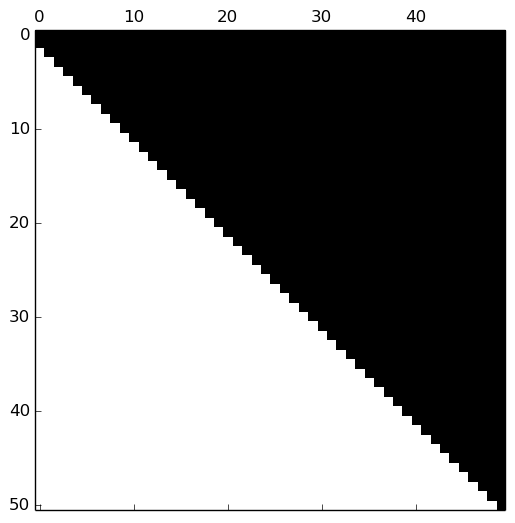

In [20]:
using PyPlot
spy(H);

It is not hard to show that we can project $A$ into $\mathcal{K}_n$ (in the $Q_n$-basis) by

$$
Q_n^*AQ_n=Q_n^*Q_{n+1}\tilde{H} = H_n,
$$
 
where $H_n$ is $\tilde{H}_n$ with the last row deleted. Eigenvalues of $H_n$ are eigenvalues of the action of $A$ as projected to $\mathcal{K}_n$. As $n\to \infty$, this begins to reveal some of the eigenvalues of $A$ itself.

In [22]:
lam = eigvals(A);
plot(real(lam),imag(lam),".")
axis("square")
axis("equal")
for j = 5:n
    lam = eig(H[1:j,1:j]);
    plot(real(lam),imag(lam),'rx')
end

LoadError: LoadError: PyError (:PyObject_Call) <type 'exceptions.ValueError'>
ValueError('Unrecognized string square to axis; try on or off',)
  File "/usr/lib/pymodules/python2.7/matplotlib/pyplot.py", line 1379, in axis
    v = ax.axis(*v, **kwargs)
  File "/usr/lib/pymodules/python2.7/matplotlib/axes.py", line 1335, in axis
    'try on or off' % s)

while loading In[22], in expression starting on line 3

Since $H_n$ is a projection of $A$, its eigenvalues are related to those of $A$

$$\{\theta_j\} = \{\text{eigenvalues of } H_n\}$$

These are called **Arnoldi eigenvalue estimates** or **Ritz values** of $A$.

We will look more closely at the convergence in the next lecture. For now, the big idea is to replace a problem on a very high-dimensional space,  $\mathbb{C}^m$, with an analog on a low-dimensional space, $\mathcal{K}_n$, using an ON basis as provided by the Arnoldi iteration.

> ** THEOREM. ** 
- The matrices $Q_n$ generated by the Arnoldi iteration are reduced QR factors of the Krylov matrix: $$K_n = Q_nR_n.$$
- The Hessenberg matrices $H_n$ are the corresponding projections: $$H_n = Q_n^* A Q_n.$$
- and the successive iterates are related by the formula: $$AQ_n = Q_{n+1} \tilde{H}_n.$$